In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('noshowappointments.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [5]:
df.columns = [x.strip().lower() for x in df.columns]

In [6]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [7]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df[df['age'] == -1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df[df['patientid'] == 4.659430e+14]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df.drop([99832], inplace = True)

In [11]:
df[df['age'] == -1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


In [12]:
df.shape

(110526, 14)

In [13]:
df.nunique()

patientid          61743
appointmentid     110526
gender                 2
scheduledday      103548
appointmentday        27
age                  103
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no-show                2
dtype: int64

In [14]:
print(sum(df.duplicated()))
print(sum(df.patientid.duplicated()))
print(sum(df.appointmentid.duplicated()))

0
48783
0


In [15]:
(df.groupby('patientid')['gender'].nunique() > 1).sum()

262

In [16]:
#df_two_gen = df.groupby('patientid').filter(lambda x: x['gender'].nunique() > 1)
df_two_gen = df[df.groupby('patientid')['gender'].transform('nunique') > 1]
print(df_two_gen.shape)
print(df_two_gen.patientid.nunique())

(945, 14)
262


In [17]:
df_two_gen.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
38,5.873320e+12,5609446,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No
51,4.694700e+13,5534635,F,2016-03-31T17:05:31Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
144,1.758330e+14,5640987,M,2016-04-29T11:56:37Z,2016-04-29T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,0,No
159,6.988860e+11,5551288,F,2016-04-06T13:42:36Z,2016-04-29T00:00:00Z,71,ANDORINHAS,0,1,1,0,0,1,No
184,7.569880e+12,5520853,F,2016-03-29T10:37:48Z,2016-04-29T00:00:00Z,3,NOVA PALESTINA,0,0,0,0,0,1,Yes


In [18]:
df_two_gen[df_two_gen['patientid'].isin([5.873320e+12, 4.694700e+13, 1.758330e+14])]\
                                        .sort_values(['patientid', 'gender', 'neighbourhood'])

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
3149,5.873320e+12,5642476,F,2016-04-29T16:04:19Z,2016-04-29T00:00:00Z,69,JESUS DE NAZARETH,0,0,0,0,1,0,No
109597,5.873320e+12,5772634,F,2016-06-03T15:52:58Z,2016-06-03T00:00:00Z,69,JESUS DE NAZARETH,0,0,0,0,1,0,No
38,5.873320e+12,5609446,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No
83764,5.873320e+12,5675152,M,2016-05-09T13:12:39Z,2016-05-13T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,0,No
51,4.694700e+13,5534635,F,2016-03-31T17:05:31Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
87758,4.694700e+13,5701915,F,2016-05-16T11:11:06Z,2016-06-06T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,No
19132,4.694700e+13,5709789,M,2016-05-17T14:32:06Z,2016-05-18T00:00:00Z,0,BELA VISTA,0,0,0,0,0,0,Yes
67777,1.758330e+14,5667836,F,2016-05-06T08:10:22Z,2016-05-06T00:00:00Z,59,JARDIM CAMBURI,0,0,0,0,0,0,No
144,1.758330e+14,5640987,M,2016-04-29T11:56:37Z,2016-04-29T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,0,No
21519,1.758330e+14,5676933,M,2016-05-09T16:54:35Z,2016-05-11T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,0,Yes


In [19]:
(df.groupby('patientid')['age'].nunique() > 1).sum()

1688

In [20]:
df_mul_ages = df[df.groupby('patientid')['age'].transform('nunique') > 1]
print(df_mul_ages.shape)
print(df_mul_ages.patientid.nunique())

(6222, 14)
1688


In [21]:
df_mul_ages.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
37,1.578130e+12,5637986,F,2016-04-29T07:35:56Z,2016-04-29T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,No
38,5.873320e+12,5609446,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No
40,9.968680e+14,5635881,F,2016-04-28T14:14:16Z,2016-04-29T00:00:00Z,55,TABUAZEIRO,0,0,0,0,0,0,No


In [22]:
df_mul_ages[df_mul_ages.patientid.isin([1.578130e+12, 5.873320e+12])].sort_values(['patientid', 'age'])

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
69150,1.578130e+12,5647094,F,2016-05-02T12:49:15Z,2016-05-02T00:00:00Z,48,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No
37,1.578130e+12,5637986,F,2016-04-29T07:35:56Z,2016-04-29T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,No
34485,1.578130e+12,5744352,F,2016-05-30T10:08:12Z,2016-05-30T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,No
68847,1.578130e+12,5639322,F,2016-04-29T08:57:23Z,2016-05-06T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,Yes
68877,1.578130e+12,5714366,F,2016-05-18T11:48:23Z,2016-05-30T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,Yes
68878,1.578130e+12,5743058,F,2016-05-30T08:39:14Z,2016-05-30T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,No
3149,5.873320e+12,5642476,F,2016-04-29T16:04:19Z,2016-04-29T00:00:00Z,69,JESUS DE NAZARETH,0,0,0,0,1,0,No
109597,5.873320e+12,5772634,F,2016-06-03T15:52:58Z,2016-06-03T00:00:00Z,69,JESUS DE NAZARETH,0,0,0,0,1,0,No
38,5.873320e+12,5609446,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No
83764,5.873320e+12,5675152,M,2016-05-09T13:12:39Z,2016-05-13T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,0,No


Here again we can observe that a `patientid` with different `ages` actually refers to different patients from different `neighbourhoods`. Therefore, a combination of `patientid and gender`, `patientid and age`, or `patientid and neighbourhood` can only denote a unique patient. And patients with `age` equals to `zero` are assumed to be new borns.

In [29]:
print(df.groupby(['patientid', 'gender']).ngroups)
print(df.groupby(['patientid', 'age']).ngroups)
print(df.groupby(['patientid', 'neighbourhood']).ngroups)
temp = df[['patientid', 'gender', 'age', 'neighbourhood']]
sum(temp.duplicated())

62005
63462
62284


47061

In [31]:
temp.drop_duplicates(inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
print(temp.groupby(['patientid', 'gender']).ngroups)
print(temp.groupby(['patientid', 'age']).ngroups)
print(temp.groupby(['patientid', 'neighbourhood']).ngroups)
print(df.shape)
print(temp.shape)

62005
63462
62284
(110526, 18)
(63465, 4)


In [53]:
temp_mul_ages = temp[temp.groupby(['patientid', 'gender', 'neighbourhood'])['age'].transform('nunique') > 1]
#temp_mul_ages.dropna(inplace = True)
print(temp_mul_ages.shape)
temp_mul_ages.head(3)

(2356, 4)


,patientid,gender,age,neighbourhood
40,9.968680e+14,F,55,TABUAZEIRO
73,4.542130e+13,F,68,REPÚBLICA
90,8.782530e+14,M,11,JUCUTUQUARA


In [54]:
df[df.patientid == 9.968680e+14]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,appointment_date,appt_year,appt_month,appt_day
40,9.968680e+14,5635881,F,2016-04-28T14:14:16Z,2016-04-29T00:00:00Z,55,TABUAZEIRO,0,0,0,0,0,0,No,2016-04-29,2016,4,29
100196,9.968680e+14,5616959,F,2016-04-25T15:06:32Z,2016-06-01T00:00:00Z,56,TABUAZEIRO,0,0,0,0,0,1,No,2016-06-01,2016,6,1


In [23]:
df['appointment_date'] = df.appointmentday.str[:10]
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,appointment_date
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29


In [24]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'], format = '%Y-%m-%d')
df.dtypes

patientid                  float64
appointmentid                int64
gender                      object
scheduledday                object
appointmentday              object
age                          int64
neighbourhood               object
scholarship                  int64
hipertension                 int64
diabetes                     int64
alcoholism                   int64
handcap                      int64
sms_received                 int64
no-show                     object
appointment_date    datetime64[ns]
dtype: object

In [25]:
df['appt_year'] = df.appointment_date.dt.year
df['appt_month'] = df.appointment_date.dt.month
df['appt_day'] = df.appointment_date.dt.day

In [55]:
df.sample(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,appointment_date,appt_year,appt_month,appt_day
37878,6.549260e+14,5662692,F,2016-05-05T08:53:53Z,2016-05-05T00:00:00Z,62,HORTO,0,1,1,0,0,0,No,2016-05-05,2016,5,5
55649,6.136720e+12,5630092,F,2016-04-27T14:44:45Z,2016-05-05T00:00:00Z,21,ANDORINHAS,1,0,0,0,0,1,No,2016-05-05,2016,5,5
21187,6.258260e+11,5728783,F,2016-05-20T18:32:21Z,2016-05-20T00:00:00Z,41,MATA DA PRAIA,0,0,0,0,0,0,No,2016-05-20,2016,5,20


In [56]:
import datetime as dt

df['appt_dayofweek'] = df.apply(lambda row: dt.date(row['appt_year'], row['appt_month'], row['appt_day']).strftime("%A"), axis=1)

In [57]:
df.sample(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,appointment_date,appt_year,appt_month,appt_day,appt_dayofweek
72557,9.133860e+11,5651140,F,2016-05-03T08:28:35Z,2016-05-03T00:00:00Z,13,ITARARÉ,1,0,0,0,0,0,No,2016-05-03,2016,5,3,Tuesday
101731,1.257190e+12,5724669,F,2016-05-20T09:53:23Z,2016-06-02T00:00:00Z,36,SANTA CLARA,0,1,0,0,0,1,No,2016-06-02,2016,6,2,Thursday


In [58]:
df.describe().age

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [59]:
bin_edges = [-0.1, 5, 16, 35, 60, 115]     #To include zero -0.1 has been chosen as the first edge
bin_names = ['infant', 'child', 'youth', 'middle_aged', 'senior']
df['age_group'] = pd.cut(df['age'], bin_edges, labels = bin_names)
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,appointment_date,appt_year,appt_month,appt_day,appt_dayofweek,age_group
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016,4,29,Friday,senior
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016,4,29,Friday,middle_aged


In [60]:
df['scheduled_date'] = df.scheduledday.str[:10]
df['scheduled_date'] = pd.to_datetime(df['scheduled_date'], format = '%Y-%m-%d')

In [61]:
df['sch_appt_diff'] = df['appointment_date'] - df['scheduled_date']
df.sample(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,...,sms_received,no-show,appointment_date,appt_year,appt_month,appt_day,appt_dayofweek,age_group,scheduled_date,sch_appt_diff
50230,1.474350e+12,5739504,F,2016-05-25T13:40:05Z,2016-05-25T00:00:00Z,9,JARDIM DA PENHA,0,0,0,...,0,No,2016-05-25,2016,5,25,Wednesday,child,2016-05-25,0 days
36870,2.498460e+14,5625870,F,2016-04-27T07:39:14Z,2016-05-06T00:00:00Z,51,RESISTÊNCIA,0,1,0,...,1,No,2016-05-06,2016,5,6,Friday,middle_aged,2016-04-27,9 days


In [62]:
df.sch_appt_diff.describe()

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: sch_appt_diff, dtype: object

In [63]:
#Converting data type of 'sch_appt_diff' from timedelta64[ns] to int
df['sch_appt_diff'] = df['sch_appt_diff'].dt.days
df.sch_appt_diff.dtype

dtype('int64')

In [64]:
sum(df.sch_appt_diff < 0)

5

Therefore, there are only five records with `appointment_date` ahead of `scheduled_date` (day on which the appointment is set), which is not possible. So let's ignore these records.

#### Question 1: 
Does the difference between `scheduled_date` and `appointment_date` impact whether or not the patient shows up?

In [91]:
#Categorising the difference between the two dates
bin_edges = [-7, 7, 20, 45, 179]
bin_names = ['low', 'medium', 'high', 'very_high']
df['diff_cat'] = pd.cut(df['sch_appt_diff'], bin_edges, labels = bin_names)
df.sample(3)

,patientid,appointmentid,gender,scheduledday,apptday,age,age_group,neighbourhood,scholarship,hypertension,...,sms_received,no_show,sch_date,appt_date,sch_appt_diff,diff_cat,appt_y,appt_m,appt_d,appt_dow
86368,2.235740e+13,5741081,F,2016-05-25T17:44:58Z,2016-06-01T00:00:00Z,44,middle_aged,ENSEADA DO SUÁ,0,0,...,1,Yes,2016-05-25,2016-06-01,7,low,2016,6,1,Wednesday
70871,5.557550e+13,5638299,M,2016-04-29T07:53:22Z,2016-05-13T00:00:00Z,38,middle_aged,PRAIA DO CANTO,0,0,...,0,No,2016-04-29,2016-05-13,14,medium,2016,5,13,Friday
99658,7.839890e+13,5786128,M,2016-06-08T08:02:25Z,2016-06-08T00:00:00Z,10,child,ITARARÉ,0,0,...,0,No,2016-06-08,2016-06-08,0,low,2016,6,8,Wednesday


In [66]:
#Reordering some columns and renaming some big column names for convenience
print(list(df.columns.values))

['patientid', 'appointmentid', 'gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show', 'appointment_date', 'appt_year', 'appt_month', 'appt_day', 'appt_dayofweek', 'age_group', 'scheduled_date', 'sch_appt_diff', 'diff_cat']


In [67]:
cols = ['patientid', 'appointmentid', 'gender', 'scheduledday', 'appointmentday', 'age', 'age_group', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show', 'scheduled_date', 'appointment_date', 'sch_appt_diff', 'diff_cat', 'appt_year', 'appt_month', 'appt_day', 'appt_dayofweek']
df = df[cols]

In [68]:
df = df.rename(columns = {'appointmentday':'apptday', 'scheduled_date':'sch_date', 'appointment_date':'appt_date',\
                          'no-show':'no_show', 'appt_dayofweek':'appt_dow', 'hipertension':'hypertension', \
                          'appt_year':'appt_y', 'appt_month':'appt_m', 'appt_day':'appt_d'})

In [69]:
df.sample(2)

,patientid,appointmentid,gender,scheduledday,apptday,age,age_group,neighbourhood,scholarship,hipertension,...,sms_received,no_show,sch_date,appt_date,sch_appt_diff,diff_cat,appt_y,appt_m,appt_d,appt_dow
73569,1.529150e+13,5645074,F,2016-05-02T09:27:31Z,2016-05-10T00:00:00Z,51,middle_aged,MARIA ORTIZ,0,0,...,1,No,2016-05-02,2016-05-10,8,medium,2016,5,10,Tuesday
59969,4.948300e+13,5671716,M,2016-05-09T07:04:47Z,2016-05-09T00:00:00Z,31,youth,CENTRO,0,0,...,0,No,2016-05-09,2016-05-09,0,low,2016,5,9,Monday


In [92]:
df.groupby('diff_cat')['no_show'].value_counts()

diff_cat   no_show
low        No         61183
           Yes         9569
medium     No         13088
           Yes         5950
high       No         11247
           Yes         5616
very_high  No          2689
           Yes         1184
Name: no_show, dtype: int64

In [93]:
#Proportions
low = len(df[(df.diff_cat == 'low') & (df.no_show == 'Yes')]) / len(df[df.diff_cat == 'low'])
medium = len(df[(df.diff_cat == 'medium') & (df.no_show == 'Yes')]) / len(df[df.diff_cat == 'medium'])
high = len(df[(df.diff_cat == 'high') & (df.no_show == 'Yes')]) / len(df[df.diff_cat == 'high'])
very_high = len(df[(df.diff_cat == 'very_high') & (df.no_show == 'Yes')]) / len(df[df.diff_cat == 'very_high'])
low, medium, high, very_high

(0.13524706015377658,
 0.31253282907868474,
 0.3330368261875111,
 0.30570617092693003)

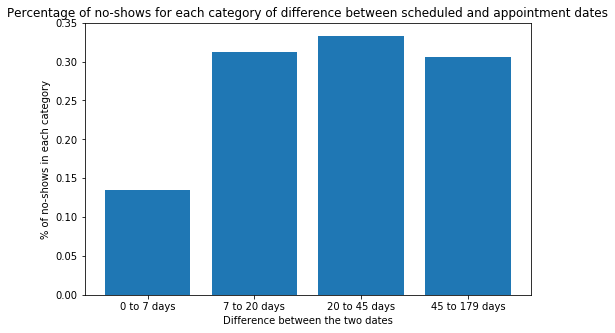

In [94]:
plt.subplots(figsize = (8, 5))
plt.title("Percentage of no-shows for each category of difference between scheduled and appointment dates")
plt.bar(['0 to 7 days', '7 to 20 days', '20 to 45 days', '45 to 179 days'], [low, medium, high, very_high])
plt.xlabel("Difference between the two dates")
plt.ylabel("% of no-shows in each category");

Therefore, we can say that the very closer the appointment date to scheduled date, the more likely the patient is to show up on the respective appointment date. But beyond seven days from the schduled date the no-show rates for the remaining three categories appear to remain more or less the same around thirty-one percent.

#### Question 2: 
Does day of week affect `no-show`?

In [72]:
df.groupby('appt_dow')['no_show'].value_counts()

appt_dow   no_show
Friday     No         14982
           Yes         4037
Monday     No         18024
           Yes         4690
Saturday   No            30
           Yes            9
Thursday   No         13909
           Yes         3338
Tuesday    No         20488
           Yes         5152
Wednesday  No         20774
           Yes         5093
Name: no_show, dtype: int64

It seems Saturday and Sunday are holidays. So let's ignore them.

In [73]:
#Proportionate no-shows on a particular daw of a week except Saturday

monday = len(df[(df.appt_dow == 'Monday') & (df.no_show == 'Yes')]) / len(df[df.appt_dow == 'Monday'])
tuesday = len(df[(df.appt_dow == 'Tuesday') & (df.no_show == 'Yes')]) / len(df[df.appt_dow == 'Tuesday'])
wednesday = len(df[(df.appt_dow == 'Wednesday') & (df.no_show == 'Yes')]) / len(df[df.appt_dow == 'Wednesday'])
thursday = len(df[(df.appt_dow == 'Thursday') & (df.no_show == 'Yes')]) / len(df[df.appt_dow == 'Thursday'])
friday = len(df[(df.appt_dow == 'Friday') & (df.no_show == 'Yes')]) / len(df[df.appt_dow == 'Friday'])

monday, tuesday, wednesday, thursday, friday

(0.20648058466144228,
 0.20093603744149766,
 0.19689179263153825,
 0.1935409056647533,
 0.21226142278773857)

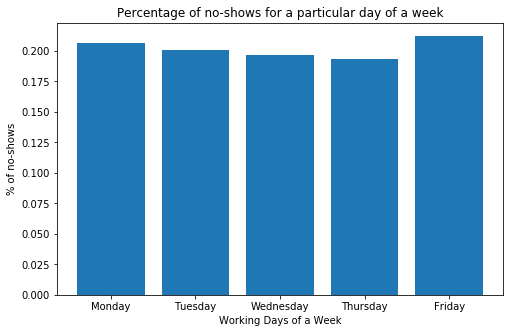

In [97]:
plt.subplots(figsize = (8, 5))
plt.title("Percentage of no-shows for a particular day of a week")
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], [monday, tuesday, wednesday, thursday, friday])
plt.xlabel("Working Days of a Week")
plt.ylabel("% of no-shows");

In [96]:
np.mean([monday, tuesday, wednesday, thursday, friday])

0.202022148637394

Hence, on Fridays the no-show rate tends to remain slightly higher at 21.26 percent than the average of 20.20 percent. Otherwise the rate is more or less the same for all working days.

#### Question 3:
Does the `age_group` have a bearing on `no_show`?

In [74]:
df.groupby('age_group')['no_show'].value_counts()

age_group    no_show
infant       No          9546
             Yes         2185
child        No         10723
             Yes         3416
youth        No         20634
             Yes         6499
middle_aged  No         30548
             Yes         7213
senior       No         16756
             Yes         3006
Name: no_show, dtype: int64

In [75]:
infant = len(df[(df.age_group == 'infant') & (df.no_show == 'Yes')]) / len(df[df.age_group == 'infant'])
child = len(df[(df.age_group == 'child') & (df.no_show == 'Yes')]) / len(df[df.age_group == 'child'])
youth = len(df[(df.age_group == 'youth') & (df.no_show == 'Yes')]) / len(df[df.age_group == 'youth'])
middle_aged = len(df[(df.age_group == 'middle_aged') & (df.no_show == 'Yes')]) / len(df[df.age_group == 'middle_aged'])
senior = len(df[(df.age_group == 'senior') & (df.no_show == 'Yes')]) / len(df[df.age_group == 'senior'])

infant, child, youth, middle_aged, senior

(0.18625863097775125,
 0.24160124478393097,
 0.23952382707404268,
 0.1910171870448346,
 0.1521101103127214)

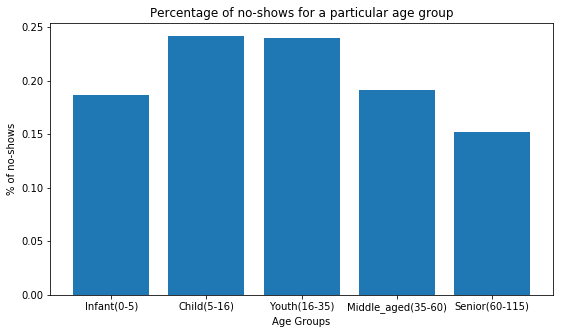

In [100]:
plt.subplots(figsize = (9, 5))
plt.title("Percentage of no-shows for a particular age group")
plt.bar(['Infant(0-5)', 'Child(5-16)', 'Youth(16-35)', 'Middle_aged(35-60)', 'Senior(60-115)'],\
        [infant, child, youth, middle_aged, senior])
plt.xlabel("Age Groups")
plt.ylabel("% of no-shows");

In [99]:
np.mean([infant, child, youth, middle_aged, senior])

0.20210220003865617

Therefore, the no-show rates for different age groups from 5 to 60 years are either above average or around average. This might be due to the reason that the majority of patients belonging to these three age groups are independent and working, due to which many of them probably are not finding time to make the visit. 

#### Question 4:
Which are the `neighbourhoods` with high number of appointments have higher `no_show` rate?

In [76]:
df.neighbourhood.describe()

count             110526
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object

In [77]:
df.neighbourhood.value_counts().describe()

count      81.000000
mean     1364.518519
std      1369.191779
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: neighbourhood, dtype: float64

Therefore, there are a total of eighty-one unique neighbourhoods with a median value of 851 appointments, so lets consider only those neighbourhoods that are having more than 851 appointments.

In [78]:
df.neighbourhood.value_counts().quantile(0.9)

2853.0

In [79]:
df_top_nbhd = df[df.groupby('neighbourhood')['neighbourhood'].transform('value_counts') > 851]
print(df_top_nbhd.neighbourhood.nunique())

40


In [102]:
top_40 = list(df_top_nbhd.neighbourhood.unique())

values = []
appointments = []

for i in range(len(top_40)):
    nbhd = top_40[i]
    num = len(df_top_nbhd[(df_top_nbhd.neighbourhood == nbhd) & (df_top_nbhd.no_show == 'Yes')])
    den = len(df_top_nbhd[df_top_nbhd.neighbourhood == nbhd])
    appointments.append(den)
    values.append(num / den)

In [105]:
data = {'Neighbourhood':top_40, 'Appointments':appointments, 'No_show_rate':values}
df_nbhd = pd.DataFrame(data)
df_nbhd.sort_values(['No_show_rate'], ascending = False, inplace = True)
df_nbhd.head()

0.2049583597678973


,Neighbourhood,Appointments,No_show_rate
28,SANTOS DUMONT,1276,0.289185
23,ITARARÉ,3514,0.262664
35,JESUS DE NAZARETH,2853,0.243954
38,ILHA DO PRÍNCIPE,2266,0.234775
29,CARATOÍRA,2565,0.230409


Therefore, the above five are the busy neighbourhoods with high no-show rates.

#### Question 5:
Which type of the condition or ailment ('hypertension', 'diabetes', 'alcoholism', 'handcap') have higher `no-show` rate?

In [87]:
hypertension = len(df[(df.hypertension == 1) & (df.no_show == 'Yes')]) / len(df[df.hypertension == 1])
diabetes = len(df[(df.diabetes == 1) & (df.no_show == 'Yes')]) / len(df[df.diabetes == 1])
alcoholism = len(df[(df.alcoholism == 1) & (df.no_show == 'Yes')]) / len(df[df.alcoholism == 1])
handcap = len(df[(df.handcap == 1) & (df.no_show == 'Yes')]) / len(df[df.handcap == 1])

hypertension, diabetes, alcoholism, handcap

(0.17301958625751113,
 0.18003273322422259,
 0.20148809523809524,
 0.1792360430950049)

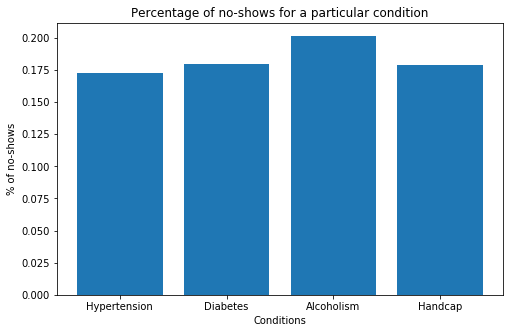

In [107]:
plt.subplots(figsize = (8, 5))
plt.title("Percentage of no-shows for a particular condition")
plt.bar(['Hypertension', 'Diabetes', 'Alcoholism', 'Handcap'],\
        [hypertension, diabetes, alcoholism, handcap])
plt.xlabel("Conditions")
plt.ylabel("% of no-shows");

Therefore, patients referred for Alcoholism tend to higher no-show rates.